# Chow Polynomial of Braid-6

First, we initialize the matroid Braid-6 and then obtain the lattice of flats. We relabel the flats for simple presentation.

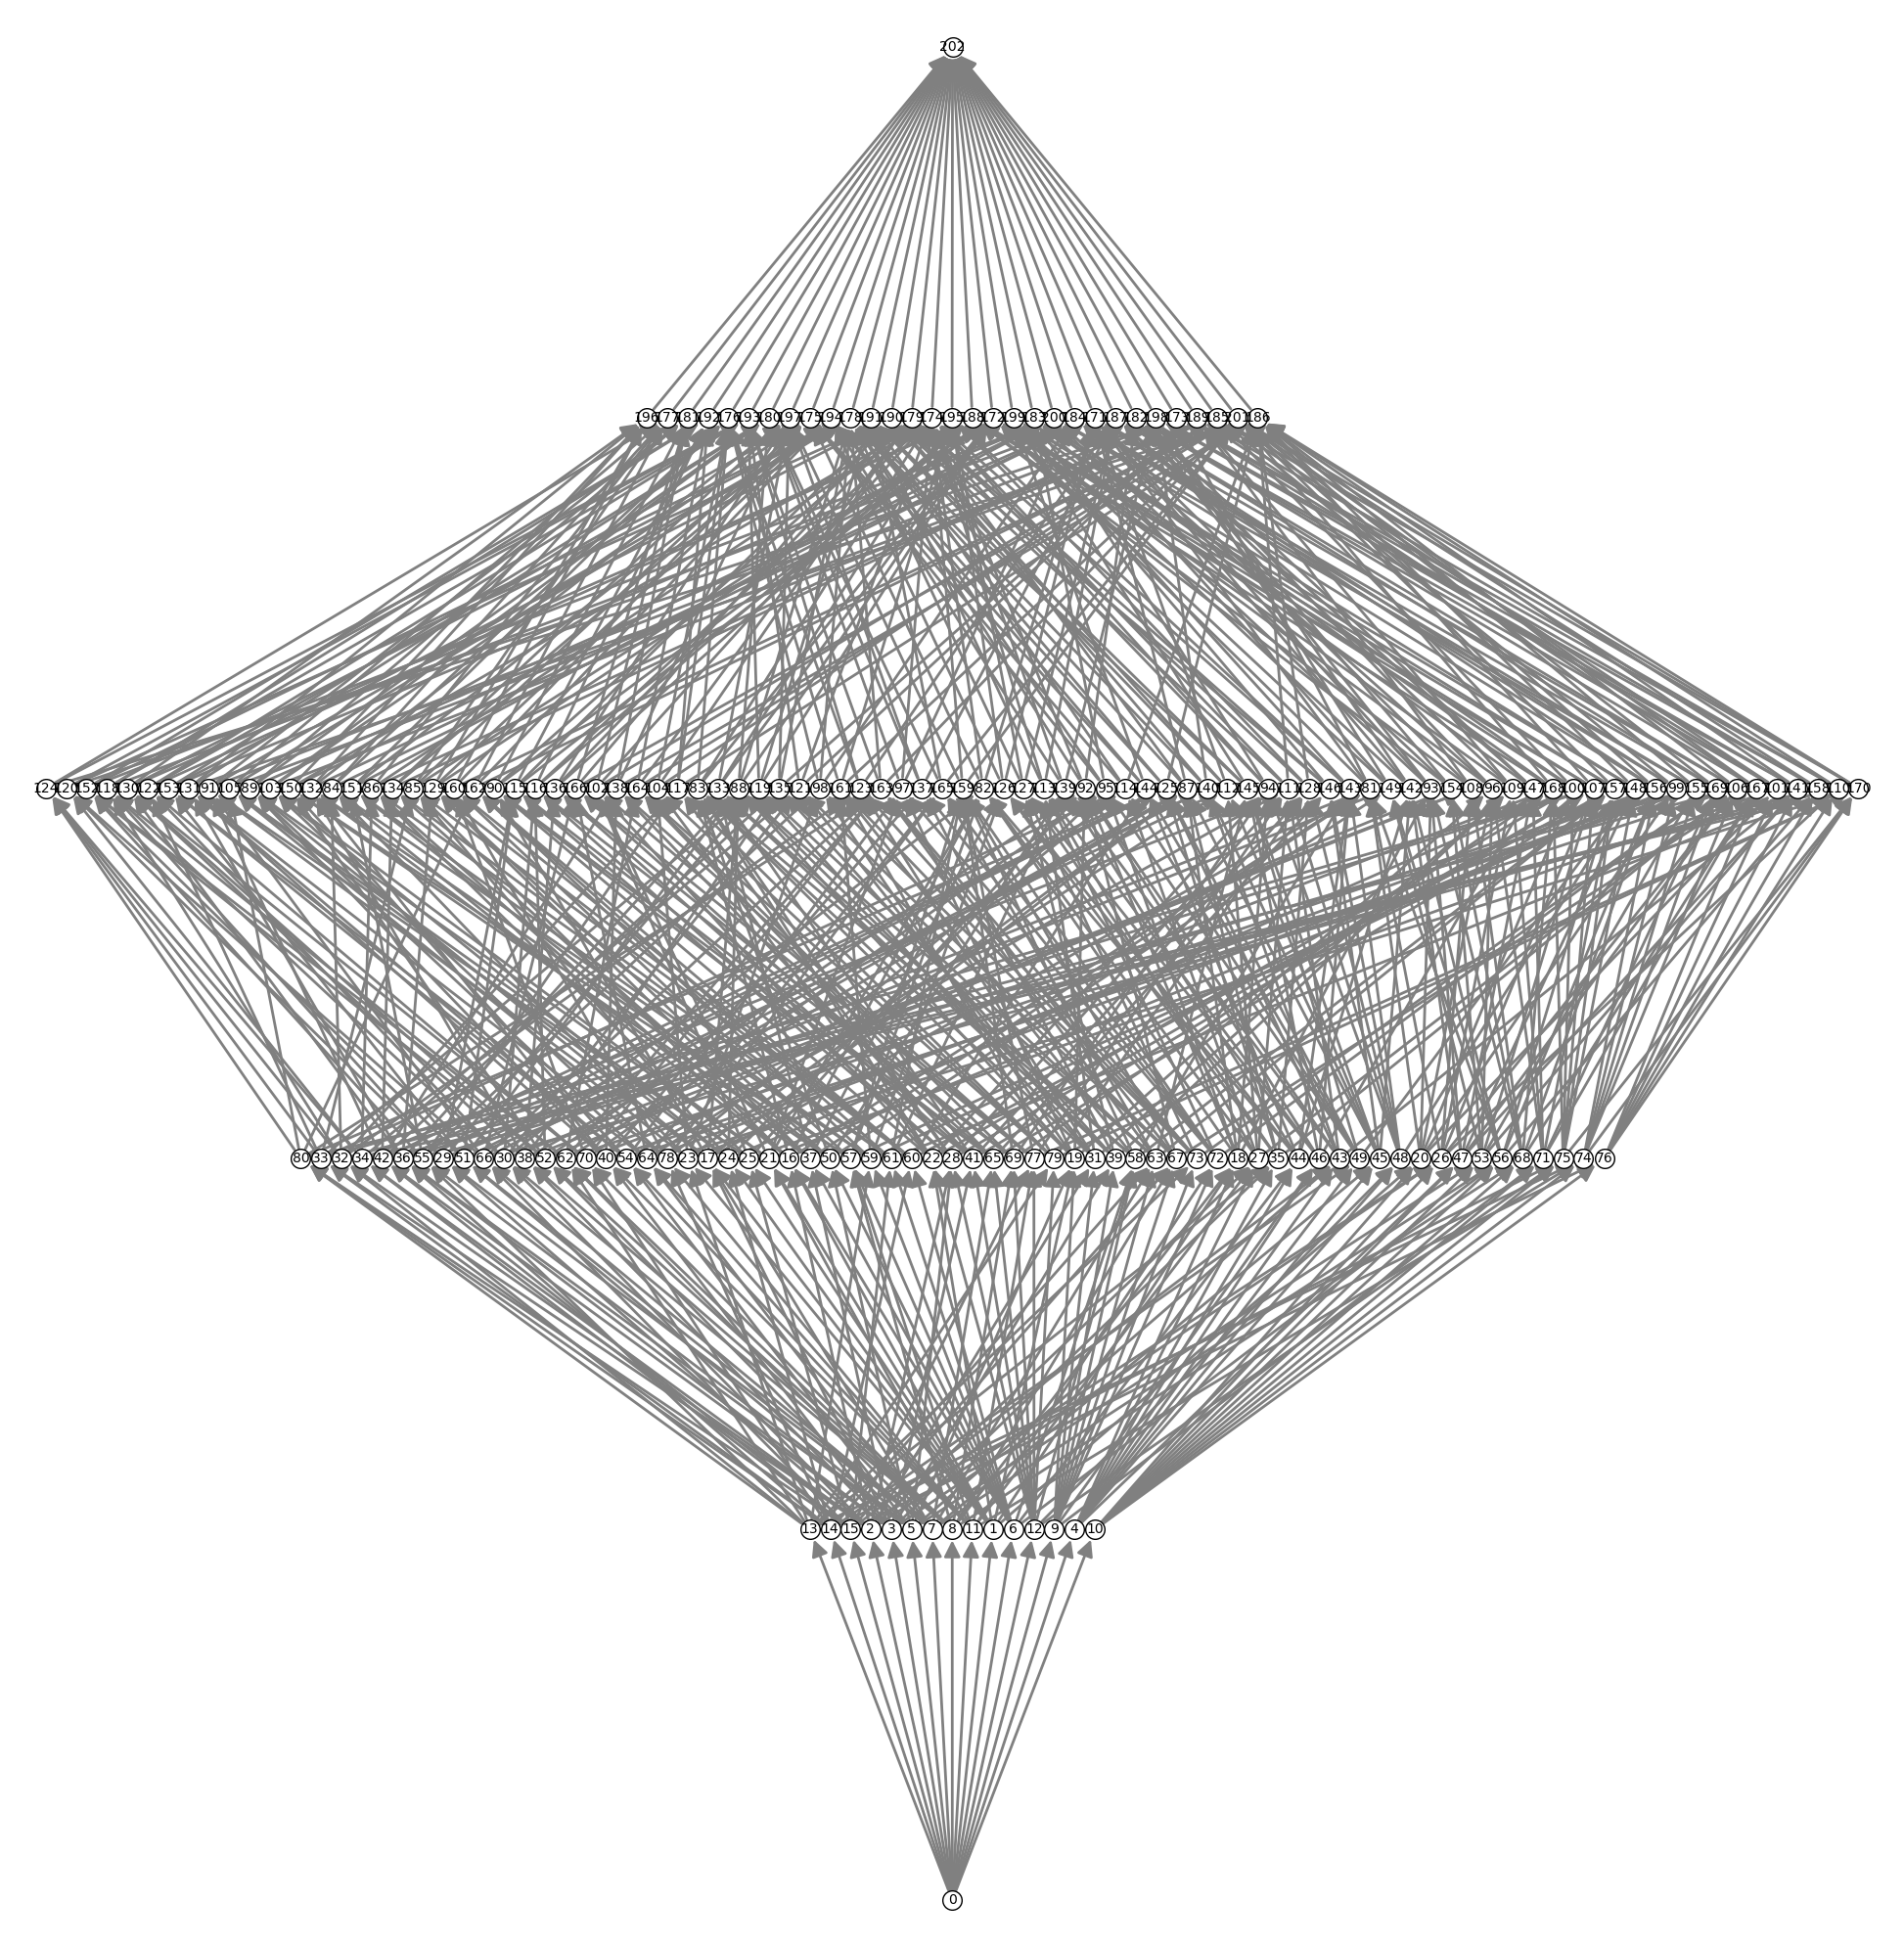

In [15]:
n = 6
edgelist = sorted(graphs.CompleteGraph(n).edges(labels=False))
matroid = Matroid(graph=edgelist, groundset=edgelist)
flats = [list(matroid.flats(i)) for i in range(n)]
all_elements = sum(flats, [])  # Flatten the list of flats
labels = {element: idx for idx, element in enumerate(all_elements)}
matroid.lattice_of_flats().plot(
    element_labels = labels, element_color = "white",
    figsize= (20,20) ,cover_color = "grey")

We now generate the possible degrees that a flat can have in a monomial. For example, if $[x_1, x_2, x_3,x_4]$ is a chain and $[0,1,0,2]$ is a weight, then we say that $x_2x_4^2$ is an fy-monomial.

In [16]:
def generate_weights(rank):
    weights = set() 
    for i in range(1, rank):
        for j in range(rank):
            weight = [0] * rank
            
            if i >= j:
                weight[i] = j
                weights.add(tuple(weight))

            if rank - (i+1) > 1:
                # Recursion to get the complete list of weights...
                y = generate_weights(rank - (i + 1)) 
                for x in y:
                    temp_weight = weight.copy()
                    weights.add(tuple(temp_weight[:i+1] + x)) 

    return [list(w) for w in weights]

rank = matroid.rank()
weights = generate_weights(rank)
weights

[[0, 0, 1, 0, 1],
 [0, 0, 0, 0, 2],
 [0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 2, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 3, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 2, 0, 0],
 [0, 0, 0, 0, 4],
 [0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 3],
 [0, 0, 0, 2, 0],
 [0, 1, 0, 0, 2]]

Next, we compute all the possible fy-monomials in the example matroid.

In [17]:
rflats = flats[1:] #empty flat is not required.
fy_monomials_list = [[] for _ in range(rank)]

def generate_monomials(weight, flats):
    if sum(weight) == 0: return [[]]
    # Find the first non-zero weight
    start_index = next(i for i in range(len(weight)) if weight[i] != 0)
    result = []

    for initial_flat in flats[start_index]:
        initial_monomial = [initial_flat] * weight[start_index]
        potential_combinations = [initial_monomial]

        for i in range(start_index + 1, len(weight)):
            if weight[i] != 0:
                new_combinations = []
                for flat in flats[i]:
                    for combo in potential_combinations:
                        if combo[-1].issubset(flat):
                            new_combo = combo + [flat] * weight[i]
                            new_combinations.append(new_combo)
                potential_combinations = new_combinations

        result.extend(potential_combinations)

    return result

for weight in weights:
    fy_monomials_list[sum(weight)].extend(generate_monomials(weight, rflats))

#example fy-monomial
print(fy_monomials_list[2][0])

[frozenset({(0, 1), (2, 3), (0, 2), (1, 2), (0, 3), (1, 3)}), frozenset({(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3), (1, 4), (2, 3), (0, 2), (4, 5), (0, 5), (2, 5), (1, 3), (3, 5)})]


We write some simplification functions to make fy-monomials look simpler. Then we write out all fy-monomials of braid-5 in this simple form.

In [18]:
def simplify(monomial):
    return tuple(sorted([labels[x] for x in monomial]))

def set_simplify(monomial_set):
    return set(sorted([simplify(x) for x in monomial_set]))

The symmetric group $G=S_6$ acts on the example matroid.  We now set up the appropriate functions required to compute the actions on the vertex set and obtain the set of orbits and their stabilizer groups.

In [19]:
G = SymmetricGroup(range(n))

def action_on_flats(g, m):
    def action_on_groundset(g, x):
        return tuple(sorted(g(y) for y in x))
    return frozenset(sorted([action_on_groundset(g,x) for x in m]))

def action_on_braidfymonomials(g, monomial):
    return tuple(sorted([action_on_flats(g,m) for m in monomial]))

def stab(G, m, action):
    return G.subgroup(set(g for g in G if action(g, m) == tuple(m)))

def orbit(G, m, action):
    return frozenset(sorted(action(g, m) for g in G))
    
def orbits(G, X, action):
    return set(orbit(G, x, action) for x in X)

Finally, we compute the orbits of the fy-monomials under the action of $G$.

In [20]:
fy_monomials_orbits = [orbits(G, fy_monomials_list[i], action_on_braidfymonomials)
    for i in range(rank)
    ]
    
orbits_dict = {}
for idx, orbit_set in enumerate(fy_monomials_orbits):
    print(f"\nrank: {idx}")
    for x in orbit_set:
        orbits_dict[x] = len(orbits_dict)
        print(f"{orbits_dict[x]}: {set_simplify(x)}\n")


rank: 0
0: {()}


rank: 1
1: {(176,), (182,), (185,), (175,), (188,), (194,), (197,), (187,), (200,), (190,), (180,), (193,), (199,), (173,), (179,)}

2: {(202,)}

3: {(118,), (121,), (127,), (124,), (130,), (133,), (139,), (142,), (145,), (84,), (90,), (148,), (93,), (99,), (160,), (96,), (102,), (108,), (166,), (105,), (169,), (114,), (117,), (126,), (132,), (129,), (135,), (138,), (89,), (141,), (86,), (150,), (95,), (98,), (165,), (162,), (168,), (113,), (110,), (116,), (119,), (128,), (131,), (140,), (85,), (143,), (149,), (94,), (152,), (91,), (97,), (158,), (155,), (161,), (100,), (164,), (109,), (115,), (167,), (112,)}

4: {(186,), (172,), (201,), (178,), (171,), (174,)}

5: {(57,), (63,), (75,), (17,), (26,), (35,), (56,), (62,), (16,), (74,), (80,), (19,), (77,), (28,), (43,), (58,), (67,), (18,), (27,), (36,)}

6: {(192,), (198,), (195,), (191,), (184,), (181,), (177,), (196,), (183,), (189,)}

7: {(51,), (60,), (66,), (69,), (72,), (78,), (23,), (20,), (29,), (32,), (38,),

Now, we compute the stabilizer of each orbit fy_monomials_orbits(rank) for all ranks.

In [21]:
for orbits in fy_monomials_orbits:
    fn = ClassFunction(G, [0] * len(G.conjugacy_classes()))
    orbits_simplify = {orbits_dict[orbit] for orbit in orbits}

    for orbit in orbits:
        orbit_num = orbits_dict[orbit]
        orbit_stab = stab(G, tuple(orbit)[0], action_on_braidfymonomials)
        print(f"Orbit {orbit_num} is stabilized by a subgroup of order {orbit_stab.order()}")
        fn += orbit_stab.trivial_character().induct(G)

    print(f"\nThe permutation representation for {orbits_simplify} is")
    for x, y in fn.decompose():
        print(f"{x} copies of {list(y.values())}")
    print("\n")


Orbit 0 is stabilized by a subgroup of order 720

The permutation representation for {0} is
1 copies of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Orbit 1 is stabilized by a subgroup of order 48
Orbit 2 is stabilized by a subgroup of order 720
Orbit 3 is stabilized by a subgroup of order 12
Orbit 4 is stabilized by a subgroup of order 120
Orbit 5 is stabilized by a subgroup of order 36
Orbit 6 is stabilized by a subgroup of order 72
Orbit 7 is stabilized by a subgroup of order 16
Orbit 8 is stabilized by a subgroup of order 48
Orbit 9 is stabilized by a subgroup of order 48

The permutation representation for {1, 2, 3, 4, 5, 6, 7, 8, 9} is
9 copies of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2 copies of [5, -1, 1, 3, -1, -1, 2, 1, -1, 0, 0]
2 copies of [5, 1, 1, -3, -1, 1, 2, -1, -1, 0, 0]
7 copies of [5, 3, 1, -1, 2, 0, -1, 1, -1, 0, -1]
9 copies of [9, 3, 1, 3, 0, 0, 0, -1, 1, -1, 0]
1 copies of [10, 2, -2, -2, 1, -1, 1, 0, 0, 0, 1]
2 copies of [16, 0, 0, 0, -2, 0, -2, 0, 0, 1, 0]


Orbit 10 is st